In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'UkraineRussianWar_70k_rows_clean_flag.csv'

In [3]:
df = pd.read_csv(filename, encoding="ISO-8859-1")
df

,Unnamed: 0,no,Time,text,target
0,0,0.0,2022-10-16 12:43:16,putin russia looses wants us stop sanctions wo...,0.0
1,1,1.0,2022-10-16 12:42:29,rt belarusian media report least 6 mig 31s dag...,0.0
2,2,2.0,2022-10-16 12:42:06,ukraine russian jets jets carrying hypersonic ...,1.0
3,3,3.0,2022-10-16 12:40:55,rt himars missle hit russian positions direction,0.0
4,4,4.0,2022-10-16 12:40:45,stick pin arse deflate ego horror unspeakable ...,0.0
...,...,...,...,...,...
69869,69869,69936.0,2022-10-07 22:51:27,last certain,0.0
69870,69870,69937.0,2022-10-07 22:51:01,consequences shelling zaporizhzhia russian arm...,1.0
69871,69871,69938.0,2022-10-07 22:50:29,last certain,0.0
69872,69872,69939.0,2022-10-07 22:50:14,birthday loser via visit maps memes news other...,1.0


In [4]:
# draw the pie graph
numOfP = df['target'].sum()
numOfN = len(df) - numOfP

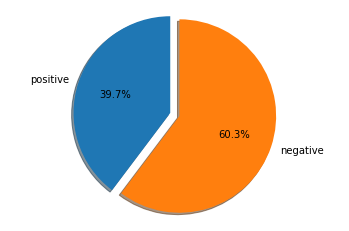

In [5]:
labels = ['positive', 'negative']
sizes = [numOfP, numOfN]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'positive')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.savefig('Demo_official.jpg')
plt.show()

In [6]:
# draw the trend over daily baiss
df["date"] = pd.to_datetime(df["Time"])
df=df.set_index(df["date"])
df['num'] = 1
df_date = df.resample('D').sum()

In [7]:
df_date['negative'] = df_date['num'] - df_date['target']
df_date

,Unnamed: 0,no,target,num,negative
date,,,,,
2022-10-07,9423810,9.432855e+06,29.0,135,106.0
2022-10-08,60018563,6.007656e+07,266.0,866,600.0
2022-10-09,172837858,1.730014e+08,942.0,2557,1615.0
2022-10-10,1168769415,1.169692e+09,5974.0,20926,14952.0
2022-10-11,653887190,6.543196e+08,7993.0,17959,9966.0
2022-10-12,280574800,2.807640e+08,6793.0,13600,6807.0
2022-10-13,81620205,8.169275e+07,3927.0,8535,4608.0
2022-10-14,11804595,1.181500e+07,1081.0,3190,2109.0
2022-10-15,2095287,2.095527e+06,562.0,1613,1051.0


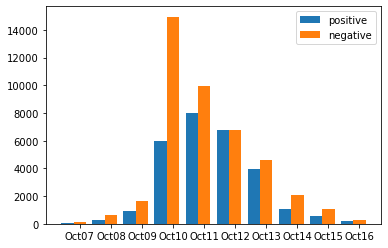

In [8]:
timeList = [i.strftime("%b") + i.strftime("%d") for i in df_date.index]
date_list = timeList
positive = df_date['target']
negative = df_date['negative']
x =list(range(len(positive)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, positive, width=width, label='positive')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, negative, width=width, label='negative',tick_label = date_list)
plt.legend()
plt.show()

